# Telecom Churn Case Study

### Performed by - Rohit Lal & Iti Sri

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data
df = pd.read_csv('telecom_churn_data.csv')

In [4]:
# Checking shape of the datset
df.shape

(99999, 226)

In [5]:
# Checking column info
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# look at data statistics
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [7]:
# viewing head of dataframe, i.e, first 5 rows.
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Cleaning Data

### Checking duplicate columns

In [8]:
df.drop_duplicates().shape

(99999, 226)

There are no duplicate rows in the data.

##### Dropping columns having only single value, since they wont't contribute to analysis

In [9]:
unique_value_counts = df.nunique()
single_valued_cols = unique_value_counts[np.where(unique_value_counts==1)[0]].index
df.drop(columns=single_valued_cols, axis=0, inplace=True)

### Checking for missing values in columns

In [10]:
def print_null_statistics(df):
    # Checking for count and percentage of null values in all columns of the dataframe.
    total_null = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total'])
    percentage_null = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                              ,columns=['Percentage'])
    return pd.concat([total_null, percentage_null], axis = 1)

In [11]:
# Checking % missing values & count of missing values for each column
print_null_statistics(df)[:20]

,Total,Percentage
night_pck_user_6,74846,74.85
arpu_2g_6,74846,74.85
count_rech_3g_6,74846,74.85
av_rech_amt_data_6,74846,74.85
count_rech_2g_6,74846,74.85
max_rech_data_6,74846,74.85
fb_user_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
total_rech_data_6,74846,74.85
arpu_3g_6,74846,74.85


- We can see there are a lot of missing data in columns
- Let's analyze the data to check if it is `meaningful missings` or `missing at random`.

In [12]:
rech_cols = [
    'total_rech_data_',
    'max_rech_data_',
    'count_rech_2g_',
    'count_rech_3g_',
    'av_rech_amt_data_',
    'fb_user_',
    'night_pck_user_',
    'arpu_3g_',
    'arpu_2g_',
]

In [13]:
# checking if null values in the columns are related

null_value_counts = []

for month in '6789':
        
    cols = [col+str(month) for col in rech_cols]
    
    null_value_counts.append({
        'month': month,
        rech_cols[0]: df[cols[0]].isnull().sum(),
        rech_cols[1]: df[cols[1]].isnull().sum(),
        rech_cols[2]: df[cols[2]].isnull().sum(),
        rech_cols[3]: df[cols[3]].isnull().sum(),
        rech_cols[4]: df[cols[4]].isnull().sum(),
        rech_cols[5]: df[cols[5]].isnull().sum(),
        rech_cols[6]: df[cols[6]].isnull().sum(),
        rech_cols[7]: df[cols[7]].isnull().sum(),
        rech_cols[8]: df[cols[8]].isnull().sum(),
        'All Nulls': df[
            df[cols[0]].isnull() & df[cols[1]].isnull() & df[cols[2]].isnull() &
            df[cols[3]].isnull() & df[cols[4]].isnull() & df[cols[5]].isnull() &
            df[cols[6]].isnull() & df[cols[7]].isnull() & df[cols[8]].isnull()
        ].index.size
    })

pd.DataFrame(null_value_counts)

,month,total_rech_data_,max_rech_data_,count_rech_2g_,count_rech_3g_,av_rech_amt_data_,fb_user_,night_pck_user_,arpu_3g_,arpu_2g_,All Nulls
0,6,74846,74846,74846,74846,74846,74846,74846,74846,74846,74846
1,7,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428
2,8,73660,73660,73660,73660,73660,73660,73660,73660,73660,73660
3,9,74077,74077,74077,74077,74077,74077,74077,74077,74077,74077


The null values in the columns: 
`total_rech_data_`, `max_rech_data_`, `count_rech_2g_`, `count_rech_3g_`, `av_rech_amt_data_`, `fb_user_`, `night_pck_user_`, `arpu_3g_`, `arpu_2g_`
are related to each other. 


All columns are together having null values. The missings are there since recharges were not done by the customer.


These are meaningful missings, hence we can replace these null values by 0

In [14]:
all_recharge_cols = [col+str(month) for col in rech_cols for month in '6789']

In [15]:
# Imputing null values with 0
df[all_recharge_cols] = df[all_recharge_cols].apply(lambda x: x.fillna(0))

##### Dropping date columns as they won't contribute to our analysis

In [16]:
date_cols = [col for col in df.columns if 'date' in col]
df.drop(columns=date_cols, inplace=True)

##### Dropping Mobile Number column - Its a unique column, would not help in model training 

In [17]:
df.drop(columns=['mobile_number'], axis=0, inplace=True)

#### Checking Categorical Columns

In [18]:
pd.DataFrame(df.nunique().sort_values()[:50], columns=['Unique Count'])[:30]

,Unique Count
night_pck_user_8,2
fb_user_9,2
fb_user_8,2
fb_user_7,2
fb_user_6,2
night_pck_user_9,2
night_pck_user_7,2
night_pck_user_6,2
monthly_2g_9,5
monthly_2g_6,5


- We will not take some constant limit (say, <30) for finding categorical columns, since taking less than 30 will divide the columns into categorical and numerical blindly without much contextual relevancee.


- For eg: If treating limit as < 30, then `count_rech_3g` & `sachet_3g` comes under categorical bracket, while `count_rech_2g` & `sachet_2g` comes under numerical category bracket, which seems not so meaningful.


- Let's use business heuristics to treat column as categorical & numerical.


- Columns `fb_user_X`, `night_pck_user_X` are clearly categorical columns.
- Columns `monthly_2g_X`, `monthly_3g_X` signifies the amount of 2G data used, hence will be considered as numerical column.
- Columns `count_rech_2g_X`, `count_rech_3g_X` signifies the count of recharges, hence a numerical entity.
- Columns `Sachet_2g_X`, `Sachet_3g_X` signifies the sachet amount, hence considered as numerical column.

In [19]:
categorical_cols = [
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'
]

In [20]:
# Numerical Columns
numerical_cols = [col for col in df.columns if col not in categorical_cols]

### Imputing Missing Values in Categorical Columns

In [21]:
print_null_statistics(df[categorical_cols])

,Total,Percentage
fb_user_9,0,0.0
fb_user_8,0,0.0
fb_user_7,0,0.0
fb_user_6,0,0.0
night_pck_user_9,0,0.0
night_pck_user_8,0,0.0
night_pck_user_7,0,0.0
night_pck_user_6,0,0.0


- Categorical columns have no missings values remaining, hence no imputation is required. 

### Imputing Missing Values in Numerical Columns

In [22]:
print_null_statistics(df[numerical_cols])

,Total,Percentage
loc_og_t2f_mou_9,7745,7.75
std_og_t2t_mou_9,7745,7.75
loc_og_t2t_mou_9,7745,7.75
loc_og_t2m_mou_9,7745,7.75
std_ic_t2f_mou_9,7745,7.75
...,...,...
max_rech_data_6,0,0.00
total_rech_data_9,0,0.00
total_rech_data_8,0,0.00
total_rech_data_7,0,0.00


In [23]:
for index, col in enumerate(numerical_cols):
    
    # Checking if column is having null value
    if df[col].isnull().sum() > 0:
        # imputing null values with median
        median_val = df[col].median()
        df[col].fillna(value=median_val, inplace=True)

In [24]:
# Checking null value statistics
print_null_statistics(df)

,Total,Percentage
sep_vbc_3g,0,0.0
spl_og_mou_8,0,0.0
loc_ic_t2t_mou_6,0,0.0
total_og_mou_9,0,0.0
total_og_mou_8,0,0.0
...,...,...
max_rech_amt_8,0,0.0
max_rech_amt_7,0,0.0
max_rech_amt_6,0,0.0
total_rech_amt_9,0,0.0


## Finding High-Value Customers

In [25]:
# Calculating total recharge amount for data

# total amount  = total recharge amount + (total recharge data * average recharge amount for data)

df['avg_rech_data_amt_67'] = (
    df['total_rech_amt_6'] + (df['total_rech_data_6'] * df['av_rech_amt_data_6']) + 
    df['total_rech_amt_7'] + (df['total_rech_data_7'] * df['av_rech_amt_data_7'])
)/2

In [26]:
percentile_70_rech_amt = np.percentile(df['avg_rech_data_amt_67'], 70)

In [27]:
high_value_cust_df = df.loc[df['avg_rech_data_amt_67'] > percentile_70_rech_amt].copy()

## Derive Churn Customers

In [28]:
# Creating churn column
high_value_cust_df['churn'] = 0

In [29]:
high_value_cust_df.loc[
    (high_value_cust_df.total_ic_mou_9 == 0) & 
    (high_value_cust_df.total_og_mou_9 == 0) & 
    (high_value_cust_df.vol_2g_mb_9 == 0) & 
    (high_value_cust_df.vol_3g_mb_9 == 0), 
    'churn'] = 1

In [30]:
high_value_cust_df.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

##### Dropping columns of 9th month, since it will not be used for training.

In [31]:
month_9_cols = [col for col in high_value_cust_df.columns if '_9' in col]
high_value_cust_df.drop(month_9_cols, axis=1, inplace=True)

### Derived Variables

- Let's formulate some derived variables

In [32]:
# Average revenue per user
high_value_cust_df['arpu_changes'] = (high_value_cust_df['arpu_6'] + high_value_cust_df['arpu_7'] + high_value_cust_df['arpu_8'])/3

In [33]:
# net call flow = total outgoing - total incoming
# net call flow --> +ve [customer does more outgoing call]
# net call flow --> -ve [customer receives more incoming call]
high_value_cust_df['net_call_flow'] = np.where(
    (high_value_cust_df['loc_og_mou_6'] + high_value_cust_df['loc_og_mou_7'] + high_value_cust_df['loc_og_mou_8'] 
     - high_value_cust_df['total_ic_mou_6'] - high_value_cust_df['total_ic_mou_7'] - high_value_cust_df['total_ic_mou_8']) > 0
    , 'Outgoing', 'Incoming')

In [34]:
# Age on network

# converting days to month
high_value_cust_df['aon'] = high_value_cust_df['aon'].div(365)

# function to convert year numeric to categorical
def year_num_to_category(year):
    if year < 1:
        return '<1'
    elif 1 <= year < 2:
        return '1-2'
    elif 2 <= year < 3:
        return '2-3'
    elif 3 <= year < 5:
        return '3-5'
    else:
        return '>5'

# applying the function
high_value_cust_df['aon'] = high_value_cust_df['aon'].apply(lambda k: year_num_to_category(k))

## EDA

In [35]:
# Categorical columns
categorical_cols = [
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn', 'net_call_flow', 'aon'
]

# Numerical Columns
numerical_cols = [col for col in high_value_cust_df.columns if col not in categorical_cols]

In [36]:
def plot_uni_boxplots(df, list_of_features):
    
    num_rows = math.ceil(len(list_of_features)/3)
    fig, axs = plt.subplots(nrows=num_rows, ncols=3)
    fig.set_size_inches(20, 5*num_rows)
    fig.subplots_adjust(wspace=0.2)
    fig.subplots_adjust(hspace=0.5)

    for col, ax in zip(list_of_features, axs.flatten()):
        sns.boxplot(data=df, x=col, ax=ax)
        ax.set_title('Range of values of {}'.format(col))
        
    plt.show()

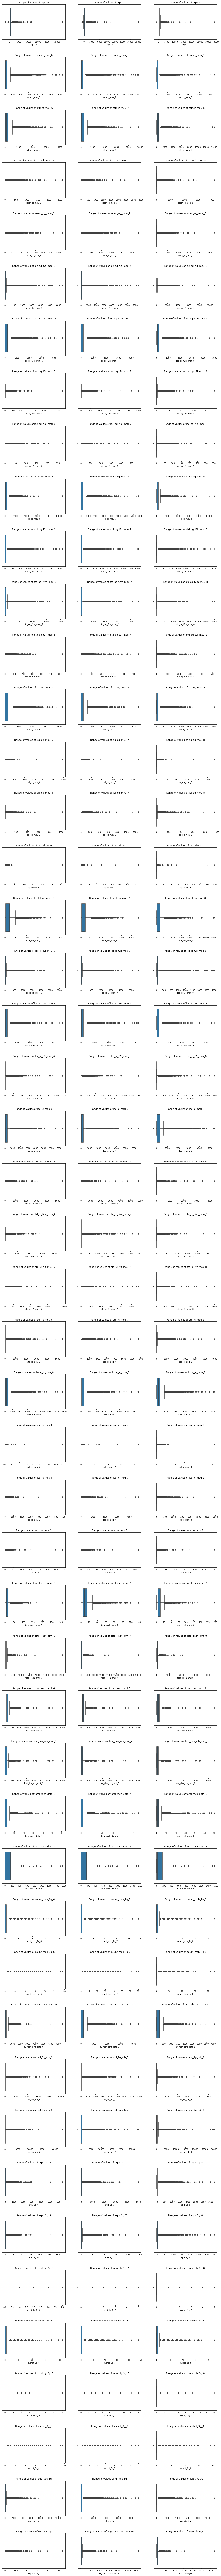

In [37]:
plot_uni_boxplots(high_value_cust_df, numerical_cols)

- We see a lot of variables have outliers.
- We will need to do Outlier treatment

#### Outlier Treatment

In [38]:
for col in numerical_cols:
    lower_qt, upper_qt = high_value_cust_df[col].quantile([0.01, 0.95]).values
    high_value_cust_df.loc[high_value_cust_df[col] < lower_qt, col] = lower_qt
    high_value_cust_df.loc[high_value_cust_df[col] > upper_qt, col] = upper_qt

In [39]:
def plot_countplots(df, list_of_features, compare_with_feature):
    
    num_rows = math.ceil(len(list_of_features)/3)
    fig, axs = plt.subplots(nrows=num_rows, ncols=3)
    fig.set_size_inches(20, 5*num_rows)
    fig.subplots_adjust(wspace=0.2)
    fig.subplots_adjust(hspace=0.5)

    for col, ax in zip(list_of_features, axs.flatten()):
        sns.countplot(data=df, x=col, hue=compare_with_feature, ax=ax)
        ax.set_title('{} v/s {}'.format(col, compare_with_feature))
        
    plt.show()

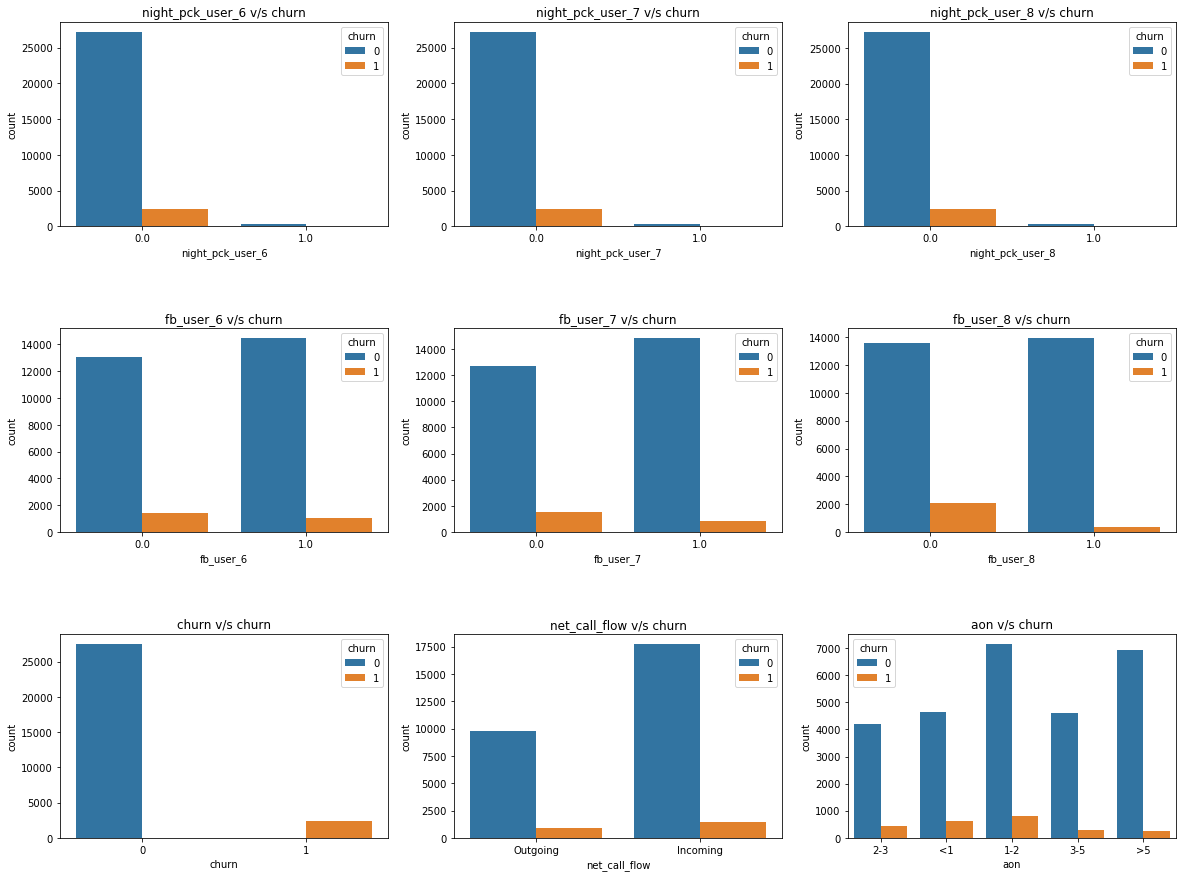

In [40]:
plot_countplots(high_value_cust_df, categorical_cols, 'churn')

- Users having `night pack` have almost negligible churns.
- `fb users` are also less likely to churn in general as compared to `non-fb` users.
- There are more number of `incoming calls` in general for both churn & non-churn users.

In [41]:
def plot_boxplots(df, list_of_features, compare_with_feature):
    
    num_rows = math.ceil(len(list_of_features)/3)
    fig, axs = plt.subplots(nrows=num_rows, ncols=3)
    fig.set_size_inches(20, 5*num_rows)
    fig.subplots_adjust(wspace=0.2)
    fig.subplots_adjust(hspace=0.5)

    for col, ax in zip(list_of_features, axs.flatten()):
        sns.boxplot(data=df, x=compare_with_feature, y=col, ax=ax)
        ax.set_title('{} v/s {}'.format(col, compare_with_feature))
        
    plt.show()

In [42]:
cols_to_plot = [
    'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
    'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
    'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
]

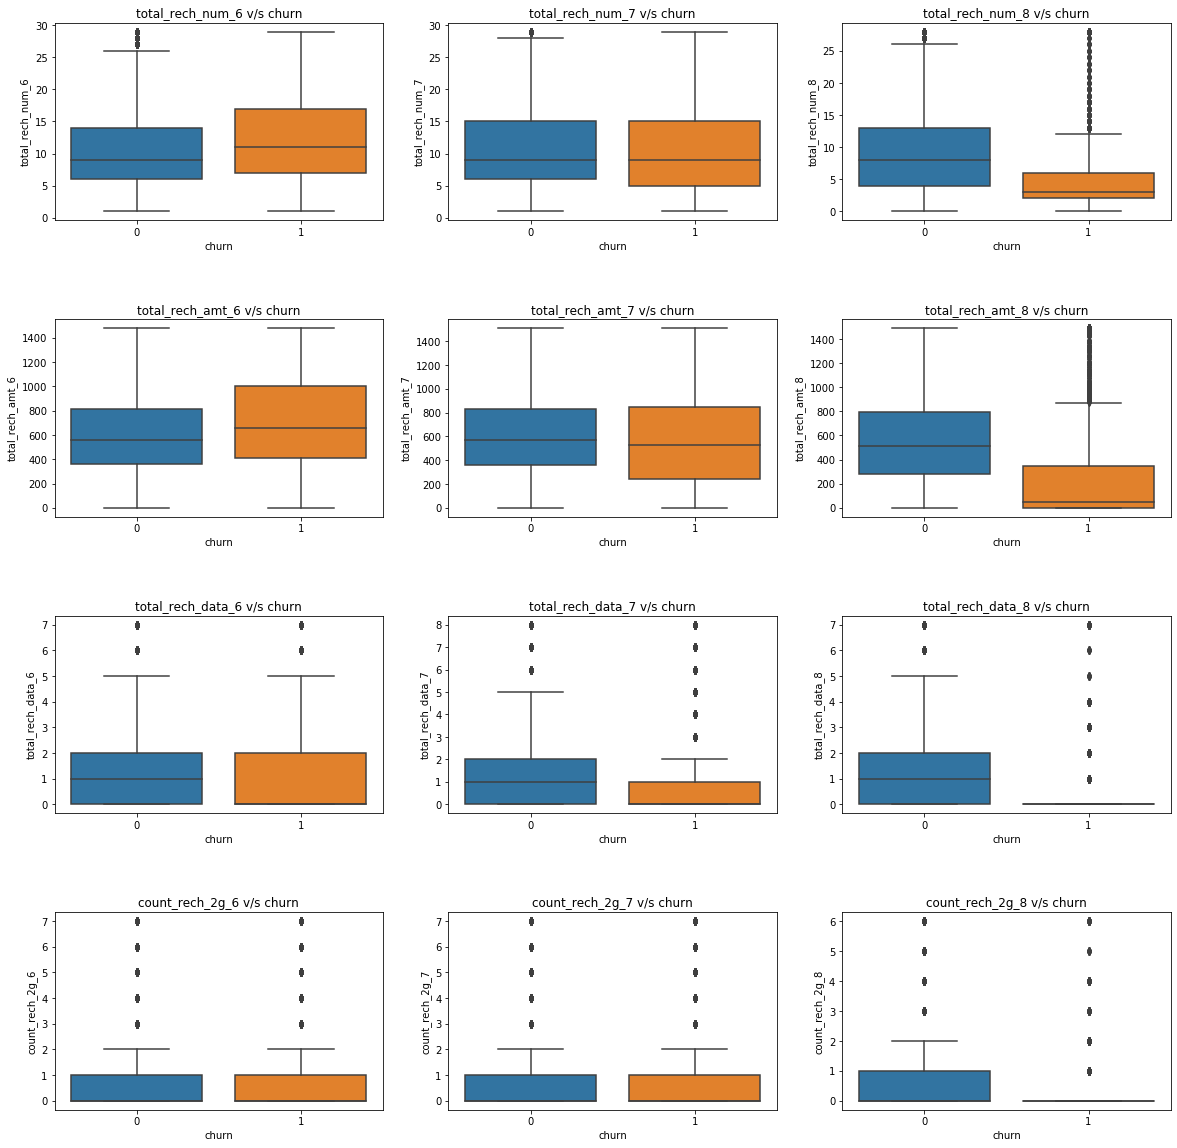

In [43]:
plot_boxplots(high_value_cust_df, cols_to_plot, 'churn')

- `Total number of recharges` have significantly dropped in 8th month for churned customers.
- `Total recharge amount` also have significantly dropped in 8th month for churned customers.
- `Total recharge data` has dropped to almost negligible during the 8th month for churned customers.
- `2g Count recharge` has also dropped to almost negligible during the 8th month for churned customers.

### Checking Collinearity

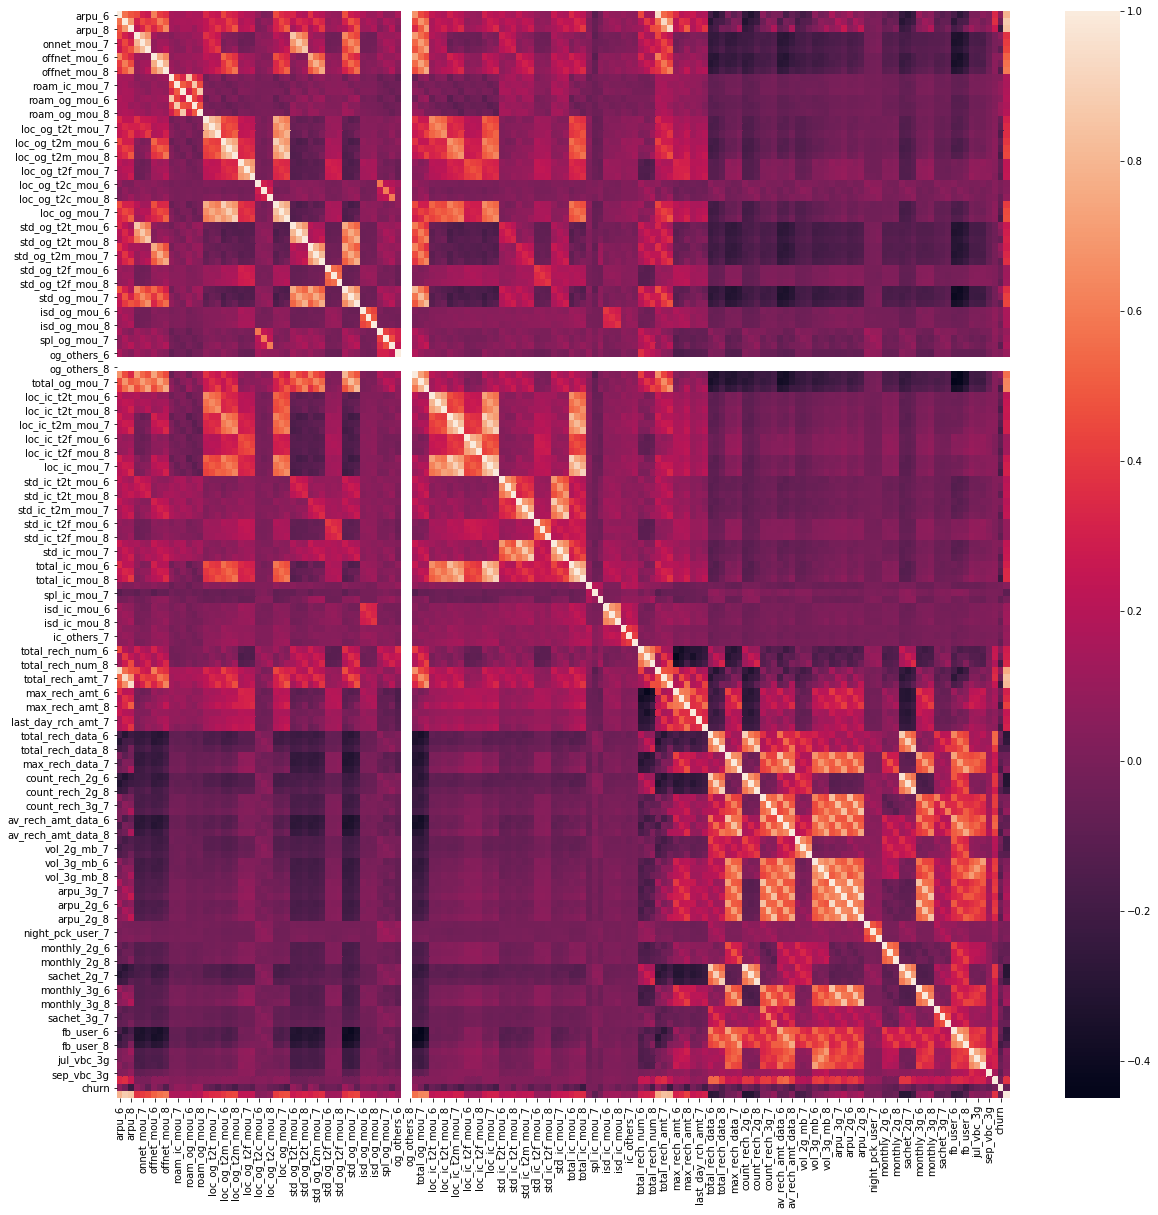

In [44]:
#Check heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(high_value_cust_df.corr())
plt.show()

- `og_others_6`, `og_others_7` & `og_others_8` are highly correlated. Let's drop 2 out of them.

In [45]:
high_value_cust_df.drop(columns=['og_others_7', 'og_others_8'], axis=1, inplace=True)

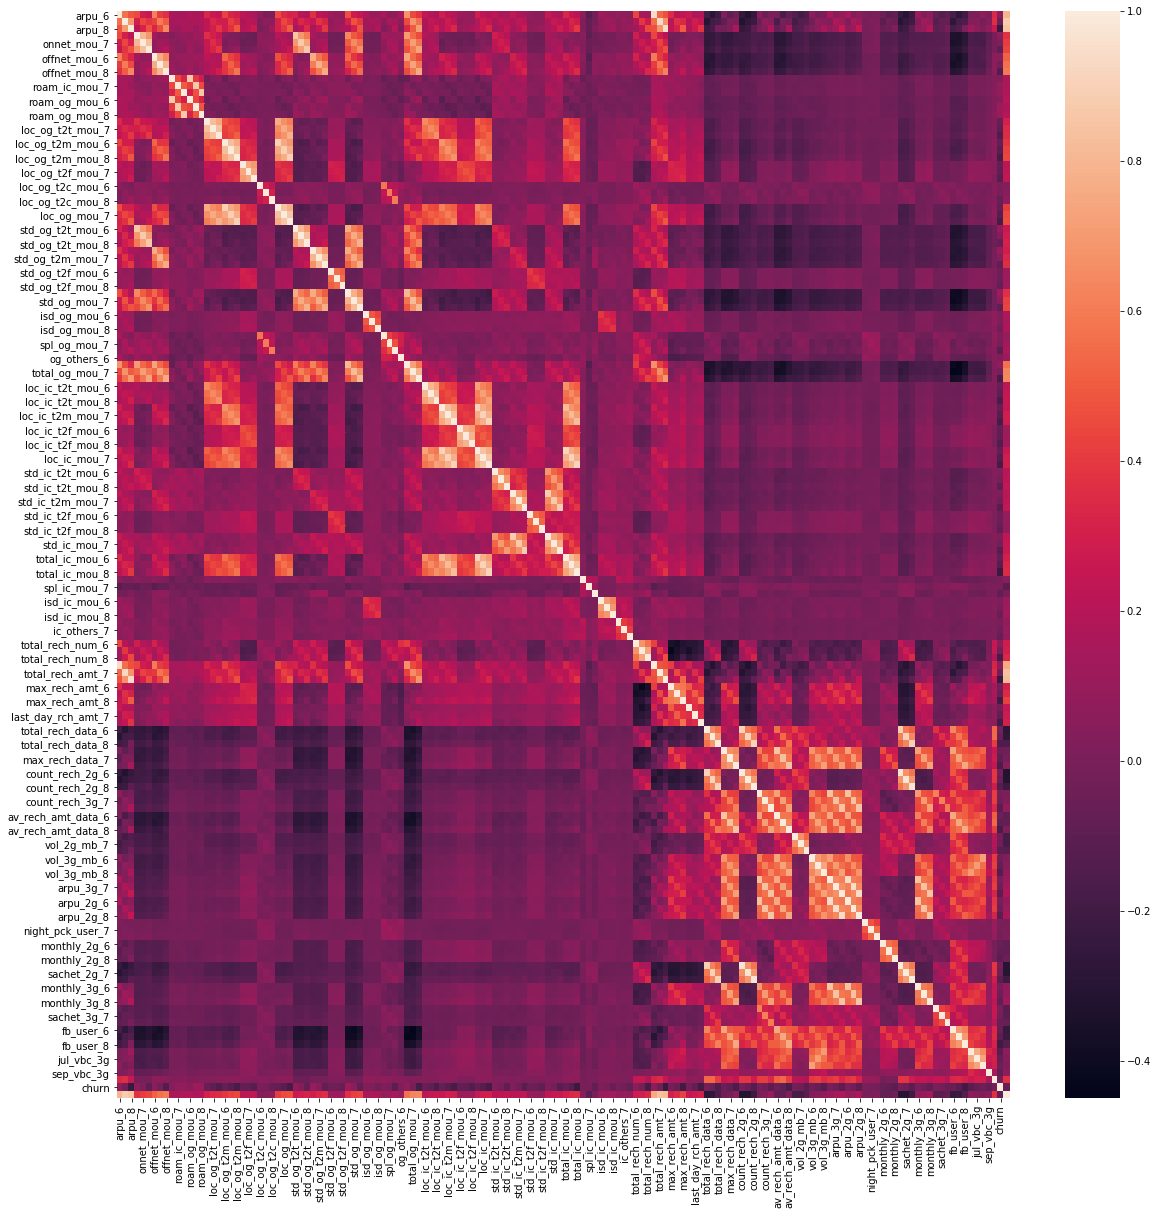

In [46]:
#Check heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(high_value_cust_df.corr())
plt.show()

### Check Class Imbalance

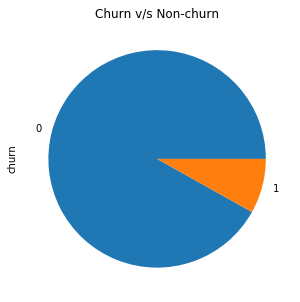

In [47]:
plt.figure(figsize=(5, 5))
plt.title('Churn v/s Non-churn')
high_value_cust_df.churn.value_counts().plot.pie()
plt.show()

In [48]:
pd.DataFrame(100*high_value_cust_df.churn.value_counts(normalize=True))

,churn
0,91.877274
1,8.122726


- We see that the data is skewed, as only `8%` data is of category `churn` where almost `92%` data is of category `non-churn`.


- We will have to handle this during training.
- We will use `class_weight` as `balanced` during training the models to handle the imbalance.

## Data Preparation

### Make dummy variables

In [49]:
categorical_cols = [
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'net_call_flow'
]

In [50]:
high_value_cust_df = pd.get_dummies(high_value_cust_df, columns=['aon', 'net_call_flow'], drop_first=True)

In [51]:
high_value_cust_df[[col for col in high_value_cust_df.columns if ('aon' in col) or ('net_call_flow' in col)]].head()

,aon_2-3,aon_3-5,aon_<1,aon_>5,net_call_flow_Outgoing
0,1,0,0,0,1
7,1,0,0,0,0
8,0,0,1,0,1
21,0,0,0,0,0
23,0,0,0,0,0


### Split Train-Test

In [52]:
X = high_value_cust_df.drop(['churn'],axis=1)
y = high_value_cust_df['churn']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 100)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20967, 156), (8986, 156), (20967,), (8986,))

### Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
cols=X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

# Modelling

## Interpretable Models

We will first try with `logistic regression` & `random forest` to identify the most important variables

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [58]:
# Running RFE with the 20 features
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [59]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'sep_vbc_3g', 'arpu_changes'],
      dtype='object')

In [60]:
lr_rfe = LogisticRegression(class_weight='balanced')
lr_rfe.fit(X_train[rfe_cols],y_train)
y_pred_lr = lr_rfe.predict(X_test[rfe_cols])

- Using `class_weight=balanced` to handle class imbalance in the data

##### Evalation Results

In [61]:
# function to print model evaluation statistics
def print_evaluation_results(y_test, y_pred):

    # confusion matrix
    confusion_mat = confusion_matrix(y_test,y_pred)

    TP = confusion_mat[1,1] # true positive 
    TN = confusion_mat[0,0] # true negatives
    FP = confusion_mat[0,1] # false positives
    FN = confusion_mat[1,0] # false negatives

    print("Confusion Matrix \n{}\n".format(confusion_mat))

    # sensitivity of the model
    print("Sensitivity: {}".format(round(TP / float(TP+FN), 2)))

    # specificity of the model
    print("Specificity: {}".format(round(TN / float(TN+FP), 2)))

    # false postive rate
    print("False positive rate: {}".format(round(FP/ float(TN+FP), 2)))

    # positive predictive value 
    print("Positive Predictive Value: {}".format(round(TP / float(TP+FP), 2)))

    # negative predictive value
    print("Negative predictive value: {}".format(round(TN / float(TN+ FN), 2)))

    # accuracy of the model
    print("Accuracy: {}\n".format(round(accuracy_score(y_test,y_pred), 4)))

    # classification report
    print("Classification Report: \n{}\n".format(classification_report(y_test, y_pred)))
    
    # returning model accuracy
    return round(100*accuracy_score(y_test,y_pred), 2)

In [62]:
acc = print_evaluation_results(y_test, y_pred_lr)

Confusion Matrix 
[[6782 1523]
 [ 106  575]]

Sensitivity: 0.84
Specificity: 0.82
False positive rate: 0.18
Positive Predictive Value: 0.27
Negative predictive value: 0.98
Accuracy: 0.8187

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8305
           1       0.27      0.84      0.41       681

    accuracy                           0.82      8986
   macro avg       0.63      0.83      0.65      8986
weighted avg       0.93      0.82      0.86      8986




In [63]:
acc = print_evaluation_results(y_test, y_pred_lr)

Confusion Matrix 
[[6782 1523]
 [ 106  575]]

Sensitivity: 0.84
Specificity: 0.82
False positive rate: 0.18
Positive Predictive Value: 0.27
Negative predictive value: 0.98
Accuracy: 0.8187

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8305
           1       0.27      0.84      0.41       681

    accuracy                           0.82      8986
   macro avg       0.63      0.83      0.65      8986
weighted avg       0.93      0.82      0.86      8986




In [64]:
print('We get a test accuracy of {} % through logistic regression model'.format(acc))

We get a test accuracy of 81.87 % through logistic regression model


In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,60.29
11,loc_ic_mou_8,56.52
6,total_og_mou_8,50.36
0,onnet_mou_8,30.38
5,std_og_mou_8,29.35
2,loc_og_t2m_mou_8,28.96
8,loc_ic_t2m_mou_8,25.49
4,std_og_t2t_mou_8,22.80
12,total_ic_mou_8,12.50
1,loc_og_t2t_mou_8,10.83


In [66]:
rfe_cols = rfe_cols.values

In [67]:
rfe_cols = rfe_cols[rfe_cols != 'loc_og_mou_8']

### Decision Tree Classfier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=100, class_weight='balanced')
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [70]:
acc = print_evaluation_results(y_test, y_pred_dtc)

Confusion Matrix 
[[7502  803]
 [ 174  507]]

Sensitivity: 0.74
Specificity: 0.9
False positive rate: 0.1
Positive Predictive Value: 0.39
Negative predictive value: 0.98
Accuracy: 0.8913

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8305
           1       0.39      0.74      0.51       681

    accuracy                           0.89      8986
   macro avg       0.68      0.82      0.72      8986
weighted avg       0.93      0.89      0.91      8986




#### Plot the ROC curve

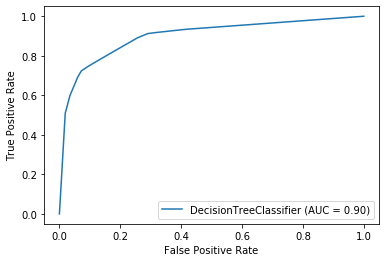

In [71]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
dtc = DecisionTreeClassifier(random_state=100, class_weight='balanced')

In [74]:
params = {
    "max_depth": [2,3,5,10,15,20,25,30],
    "min_samples_leaf": [5,10,20,50,100,500]
}

grid_search = GridSearchCV(
    estimator=dtc,
    param_grid=params,
    cv=5,
    n_jobs=-1, verbose=1, scoring="accuracy")

In [75]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.6min finished


Wall time: 1min 40s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [76]:
grid_search.best_score_

0.8902082188209999

In [77]:
dtc_best = grid_search.best_estimator_
dtc_best

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, random_state=100)

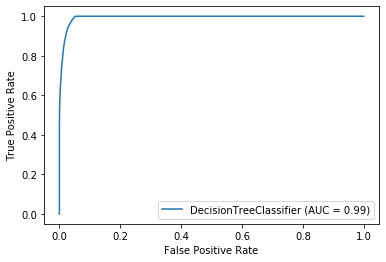

In [78]:
plot_roc_curve(dtc_best, X_train, y_train)
plt.show()

In [79]:
y_pred_dtc_best = dtc_best.predict(X_test)

In [80]:
acc = print_evaluation_results(y_test, y_pred_dtc_best)

Confusion Matrix 
[[7588  717]
 [ 227  454]]

Sensitivity: 0.67
Specificity: 0.91
False positive rate: 0.09
Positive Predictive Value: 0.39
Negative predictive value: 0.97
Accuracy: 0.8949

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8305
           1       0.39      0.67      0.49       681

    accuracy                           0.89      8986
   macro avg       0.68      0.79      0.72      8986
weighted avg       0.93      0.89      0.91      8986




In [81]:
print('We get a test accuracy of {} % through decision tree classifier model'.format(acc))

We get a test accuracy of 89.49 % through decision tree classifier model


### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc = RandomForestClassifier(random_state=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=100)

In [84]:
y_pred_rfc = rfc.predict(X_test)

##### Evaluation Results

In [85]:
acc = print_evaluation_results(y_test, y_pred_rfc)

Confusion Matrix 
[[8220   85]
 [ 386  295]]

Sensitivity: 0.43
Specificity: 0.99
False positive rate: 0.01
Positive Predictive Value: 0.78
Negative predictive value: 0.96
Accuracy: 0.9476

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8305
           1       0.78      0.43      0.56       681

    accuracy                           0.95      8986
   macro avg       0.87      0.71      0.76      8986
weighted avg       0.94      0.95      0.94      8986




- We get a test accuracy of `94.86 %` through Random forest

### Hyper-parameter tuning for the Random Forest

In [86]:
rfc = RandomForestClassifier(random_state=100, n_jobs=-1, class_weight='balanced')

In [87]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=params,
    cv = 5,
    n_jobs=-1, verbose=1, 
    scoring="accuracy"
)

In [88]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  7.5min finished


Wall time: 7min 34s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [89]:
grid_search.best_score_

0.9391422859886036

In [90]:
rfc_best = grid_search.best_estimator_
rfc_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_jobs=-1, random_state=100)

In [91]:
y_pred_rfc_best = rfc_best.predict(X_test)

In [92]:
%config Completer.use_jedi = False

In [93]:
acc = print_evaluation_results(y_test, y_pred_rfc_best)

Confusion Matrix 
[[8083  222]
 [ 272  409]]

Sensitivity: 0.6
Specificity: 0.97
False positive rate: 0.03
Positive Predictive Value: 0.65
Negative predictive value: 0.97
Accuracy: 0.945

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8305
           1       0.65      0.60      0.62       681

    accuracy                           0.95      8986
   macro avg       0.81      0.79      0.80      8986
weighted avg       0.94      0.95      0.94      8986




In [94]:
print('We get a test accuracy of {} % through Random forest model'.format(acc))

We get a test accuracy of 94.5 % through Random forest model


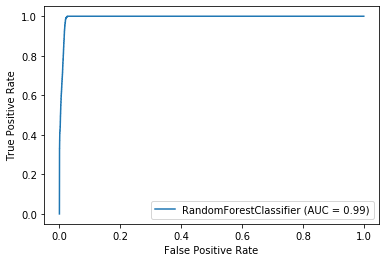

In [95]:
plot_roc_curve(rfc_best, X_train, y_train)
plt.show()

##### Top 15 Important Features

In [96]:
imp_features_df = pd.DataFrame({
    "Features": X_train.columns,
    "Imp": rfc_best.feature_importances_
})

In [97]:
top_15_features = imp_features_df.sort_values(by="Imp", ascending=False)[:15]
top_30_features = imp_features_df.sort_values(by="Imp", ascending=False)[:30]

In [98]:
top_15_features.head()

,Features,Imp
78,total_ic_mou_8,0.072102
93,total_rech_amt_8,0.043322
2,arpu_8,0.041754
99,last_day_rch_amt_8,0.037940
57,loc_ic_t2m_mou_8,0.035045


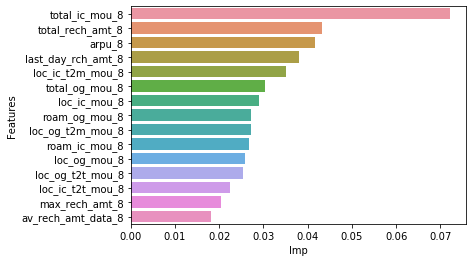

In [99]:
sns.barplot(y=top_15_features.Features, x=top_15_features.Imp)
plt.show()

## High Accuracy Modelling (Non-Interpretable)

Let's try to improve the model performance further by reducing the features through PCA and then apply classification models.

### PCA

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(random_state=100)

In [102]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [103]:
X_train_pca.shape, X_test_pca.shape

((20967, 156), (8986, 156))

In [104]:
# Components of PCA
pca.components_

array([[-5.48483418e-02, -5.50285637e-02, -4.10418692e-02, ...,
         1.29101991e-02,  4.97897597e-03, -3.88873358e-02],
       [ 1.04762398e-01,  1.12395792e-01,  1.32960442e-01, ...,
        -4.58197794e-02,  1.09474585e-01,  6.99411268e-02],
       [ 7.44929679e-02,  9.25698687e-02,  8.42554392e-02, ...,
         3.48547957e-02, -9.47661587e-02, -3.92738366e-02],
       ...,
       [-2.31890708e-04,  2.66722434e-04,  1.07269837e-03, ...,
         5.72549017e-04,  3.35376004e-04, -1.86782627e-05],
       [ 9.77353075e-03,  3.37852609e-04, -1.73060209e-03, ...,
         7.97452224e-04,  4.71895656e-04,  1.84959715e-04],
       [-1.48987783e-03,  4.30375681e-03, -4.50147815e-03, ...,
        -5.97993353e-04, -1.94487937e-04, -4.86326123e-04]])

In [105]:
pca_features = pd.DataFrame({
    'Feature':list(X_train.columns),
    'PC1':pca.components_[0],
    'PC2':pca.components_[1], 
    'PC3':pca.components_[2]
})

pca_features.head()

,Feature,PC1,PC2,PC3
0,arpu_6,-0.054848,0.104762,0.074493
1,arpu_7,-0.055029,0.112396,0.092570
2,arpu_8,-0.041042,0.132960,0.084255
3,onnet_mou_6,-0.092546,0.024706,0.093095
4,onnet_mou_7,-0.094212,0.027540,0.105645


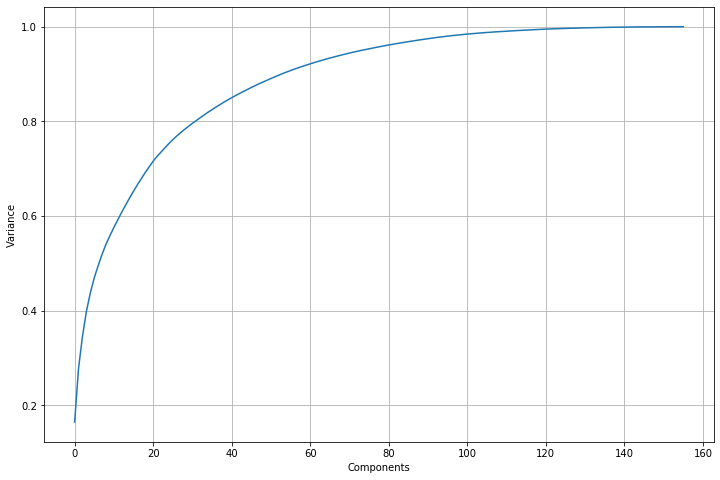

In [106]:
# Scree plot - PCA
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

- Around 90% variance is covered by 50 component

In [107]:
pca = PCA(n_components=50, random_state=100)

In [108]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [109]:
X_train_pca.shape, X_test_pca.shape

((20967, 50), (8986, 50))

### Logistic Regression after PCA

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [111]:
lr_pca = LogisticRegression(class_weight='balanced')
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)

##### Evalation Results

In [112]:
acc = print_evaluation_results(y_test, y_pred_lr_pca)

Confusion Matrix 
[[6839 1466]
 [ 104  577]]

Sensitivity: 0.85
Specificity: 0.82
False positive rate: 0.18
Positive Predictive Value: 0.28
Negative predictive value: 0.99
Accuracy: 0.8253

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8305
           1       0.28      0.85      0.42       681

    accuracy                           0.83      8986
   macro avg       0.63      0.84      0.66      8986
weighted avg       0.93      0.83      0.86      8986




In [113]:
print('We get a test accuracy of {} % through logistic regression model'.format(acc))

We get a test accuracy of 82.53 % through logistic regression model


### Decision Tree Classfier after PCA

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtc_pca = DecisionTreeClassifier(max_depth=4, random_state=100, class_weight='balanced')
dtc_pca.fit(X_train_pca, y_train)
y_pred_dtc_pca = dtc_pca.predict(X_test_pca)

In [116]:
acc = print_evaluation_results(y_test, y_pred_dtc_pca)

Confusion Matrix 
[[5670 2635]
 [ 130  551]]

Sensitivity: 0.81
Specificity: 0.68
False positive rate: 0.32
Positive Predictive Value: 0.17
Negative predictive value: 0.98
Accuracy: 0.6923

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.68      0.80      8305
           1       0.17      0.81      0.28       681

    accuracy                           0.69      8986
   macro avg       0.58      0.75      0.54      8986
weighted avg       0.92      0.69      0.76      8986




#### Plot the ROC curve

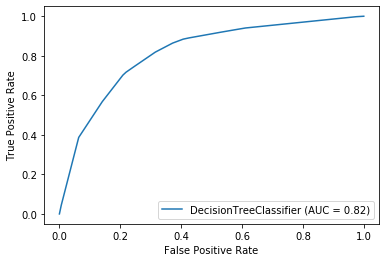

In [117]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc_pca, X_train_pca, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
dtc_pca = DecisionTreeClassifier(random_state=100, class_weight='balanced')

In [120]:
params = {
    "max_depth": [2,3,5,10,15,20,25,30],
    "min_samples_leaf": [5,10,20,50,100,500]
}

grid_search = GridSearchCV(
    estimator=dtc_pca,
    param_grid=params,
    cv=5,
    n_jobs=-1, verbose=1, scoring="accuracy")

In [121]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.2min finished


Wall time: 1min 11s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [122]:
grid_search.best_score_

0.8510037222834661

In [123]:
dtc_best = grid_search.best_estimator_
dtc_best

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=5, random_state=100)

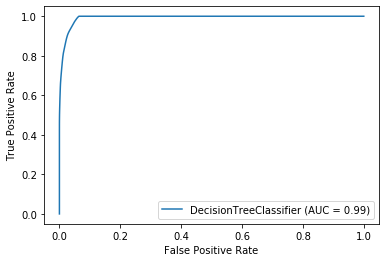

In [124]:
plot_roc_curve(dtc_best, X_train_pca, y_train)
plt.show()

In [125]:
y_pred_dtc_pca = dtc_best.predict(X_test_pca)

In [126]:
acc = print_evaluation_results(y_test, y_pred_dtc_pca)

Confusion Matrix 
[[7385  920]
 [ 334  347]]

Sensitivity: 0.51
Specificity: 0.89
False positive rate: 0.11
Positive Predictive Value: 0.27
Negative predictive value: 0.96
Accuracy: 0.8604

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      8305
           1       0.27      0.51      0.36       681

    accuracy                           0.86      8986
   macro avg       0.62      0.70      0.64      8986
weighted avg       0.90      0.86      0.88      8986




In [127]:
print('We get a test accuracy of {} % through decision tree classifier model'.format(acc))

We get a test accuracy of 86.04 % through decision tree classifier model


### Random Forest After PCA

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rfc_pca = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True, class_weight='balanced')
rfc_pca.fit(X_train_pca, y_train)
y_pred_rfc_pca = rfc_pca.predict(X_test_pca)

In [130]:
rfc_pca.oob_score_

0.760146897505604

In [131]:
print_evaluation_results(y_test, y_pred_rfc_pca)

Confusion Matrix 
[[6786 1519]
 [ 175  506]]

Sensitivity: 0.74
Specificity: 0.82
False positive rate: 0.18
Positive Predictive Value: 0.25
Negative predictive value: 0.97
Accuracy: 0.8115

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8305
           1       0.25      0.74      0.37       681

    accuracy                           0.81      8986
   macro avg       0.61      0.78      0.63      8986
weighted avg       0.92      0.81      0.85      8986




81.15

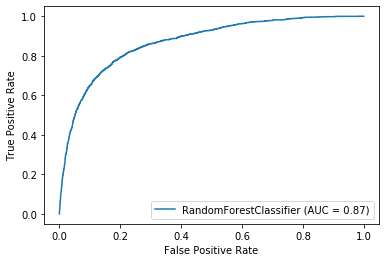

In [132]:
plot_roc_curve(rfc_pca, X_train_pca, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [133]:
rfc_pca = RandomForestClassifier(random_state=100, n_jobs=-1, class_weight='balanced')

In [134]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(
    estimator=rfc_pca,
    param_grid=params,
    cv = 5,
    n_jobs=-1, verbose=1, 
    scoring="accuracy"
)

In [135]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.6min finished


Wall time: 9min 39s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [136]:
grid_search.best_score_

0.9226880393452721

In [137]:
rfc_pca_best = grid_search.best_estimator_
rfc_pca_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_estimators=50, n_jobs=-1,
                       random_state=100)

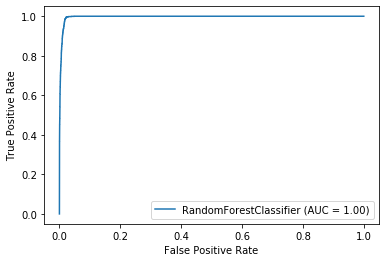

In [138]:
plot_roc_curve(rfc_pca_best, X_train_pca, y_train)
plt.show()

In [139]:
y_pred_rfc_pca_best = rfc_pca_best.predict(X_test_pca)

In [140]:
print_evaluation_results(y_test, y_pred_rfc_pca_best)

Confusion Matrix 
[[8050  255]
 [ 376  305]]

Sensitivity: 0.45
Specificity: 0.97
False positive rate: 0.03
Positive Predictive Value: 0.54
Negative predictive value: 0.96
Accuracy: 0.9298

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8305
           1       0.54      0.45      0.49       681

    accuracy                           0.93      8986
   macro avg       0.75      0.71      0.73      8986
weighted avg       0.92      0.93      0.93      8986




92.98

## Conclusion

### Important variables

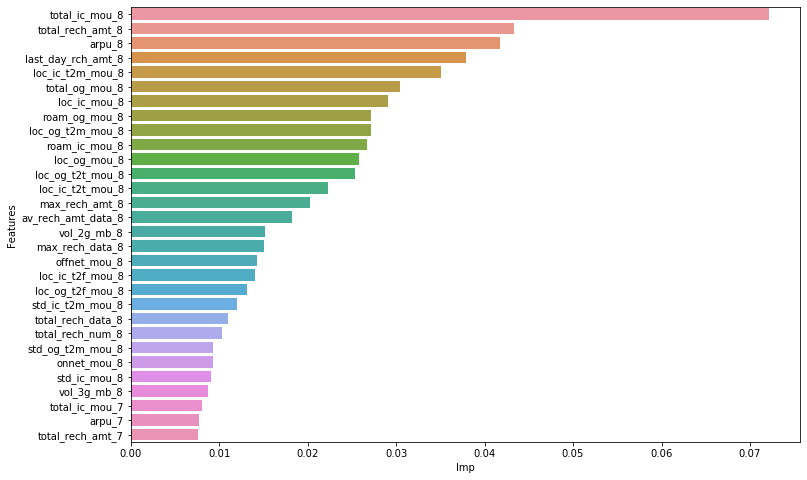

In [141]:
# Important features
plt.figure(figsize=(12, 8))
sns.barplot(y=top_30_features.Features, x=top_30_features.Imp)
plt.show()

### Model Statistics

- We got below model performances on test set - 


- We got the best accuracy of `94.5 %` via `Random Forest model without PCA`.
- We got the best sensitivity of `0.85` via `Logistic regression model with PCA`.
- We got the best specificity of `0.97` again via `Random Forest model`.


- Considering the business problem, we should choose the model with best `sensitivity`, as it is important to predict churn customers currently even if a few non-churn being classifies as churn (as it is more important to save the customer from getting churned)

### Business Insights

- Both `Roaming incoming` & `Roaming outgoing` are high importance features. Telecom company should provide offers to the roaming customers.
- `Std outgoing` & `std incoming` are also important factors. Telecom company should give cheaper plans for std usage.
- `ARPU`, i.e, average revenue per user is also an important feature to predict churn. As `arpu` starts dropping, user is more likely to churn.
- `Last day recharge amount` is also an important variable for predicting churn.